In [ ]:
# Install all dependencies
%pip install weblinx[all]

In [4]:
from pathlib import Path
import weblinx as wl


wl_dir = Path("./wl_data")
base_dir = wl_dir / "demonstrations"
# split_path = wl_dir / "splits.json"

# Load the name of the demonstrations in the training split
#demo_names = wl.utils.load_demo_names_in_split(split_path, split='train')
# You can use: train, valid, test_iid, test_vis, test_cat, test_geo, test_web
# Or you can specify the demo_names yourself, such as the ones we just fetched
demo_names = ['aaabtsd', 'aajfwoq', 'aathhdu']  # 3 random demo from valid

# Load the demonstrations
demos = [wl.Demonstration(name, base_dir=base_dir) for name in demo_names]

# Select a demo to work with
demo = demos[0]

# Load the Replay object, which contains the turns of the demonstration
replay = wl.Replay.from_demonstration(demo)

# Filter the turns to keep only the ones that are relevant for the task
turns = replay.filter_by_intents(
    "click", "textInput", "load", "say", "submit"
)

# Only keep the turns that have a good screenshot (i.e., the screenshot is not empty)
turns = wl.filter_turns(
    turns, lambda t: t.has_screenshot() and t.get_screenshot_status() == "good"
)

# Remove chat turns where the speaker is not the navigator (e.g. if you want to train a model to predict the next action)
turns = wl.filter_turns(
    turns,
    lambda turn: not (
        turn.type == "chat" and turn.get("speaker") != "navigator"
    ),
)

In [5]:
turns[::2]

[Turn(index=7, demo_name=aaabtsd, base_dir=wl_data/demonstrations),
 Turn(index=10, demo_name=aaabtsd, base_dir=wl_data/demonstrations),
 Turn(index=17, demo_name=aaabtsd, base_dir=wl_data/demonstrations),
 Turn(index=23, demo_name=aaabtsd, base_dir=wl_data/demonstrations),
 Turn(index=32, demo_name=aaabtsd, base_dir=wl_data/demonstrations)]

HTML sneak peak: <head data-webtasks-id="a9de6cb6-4676-450b"><script type="text/javascript" 
Random Bounding Box: {'x': 261.6000061035156, 'y': 412, 'width': 657.3250122070312, 'height': 654.2125244140625, 'top': 412, 'right': 918.9250183105469, 'bottom': 1066.2125244140625, 'left': 261.6000061035156}



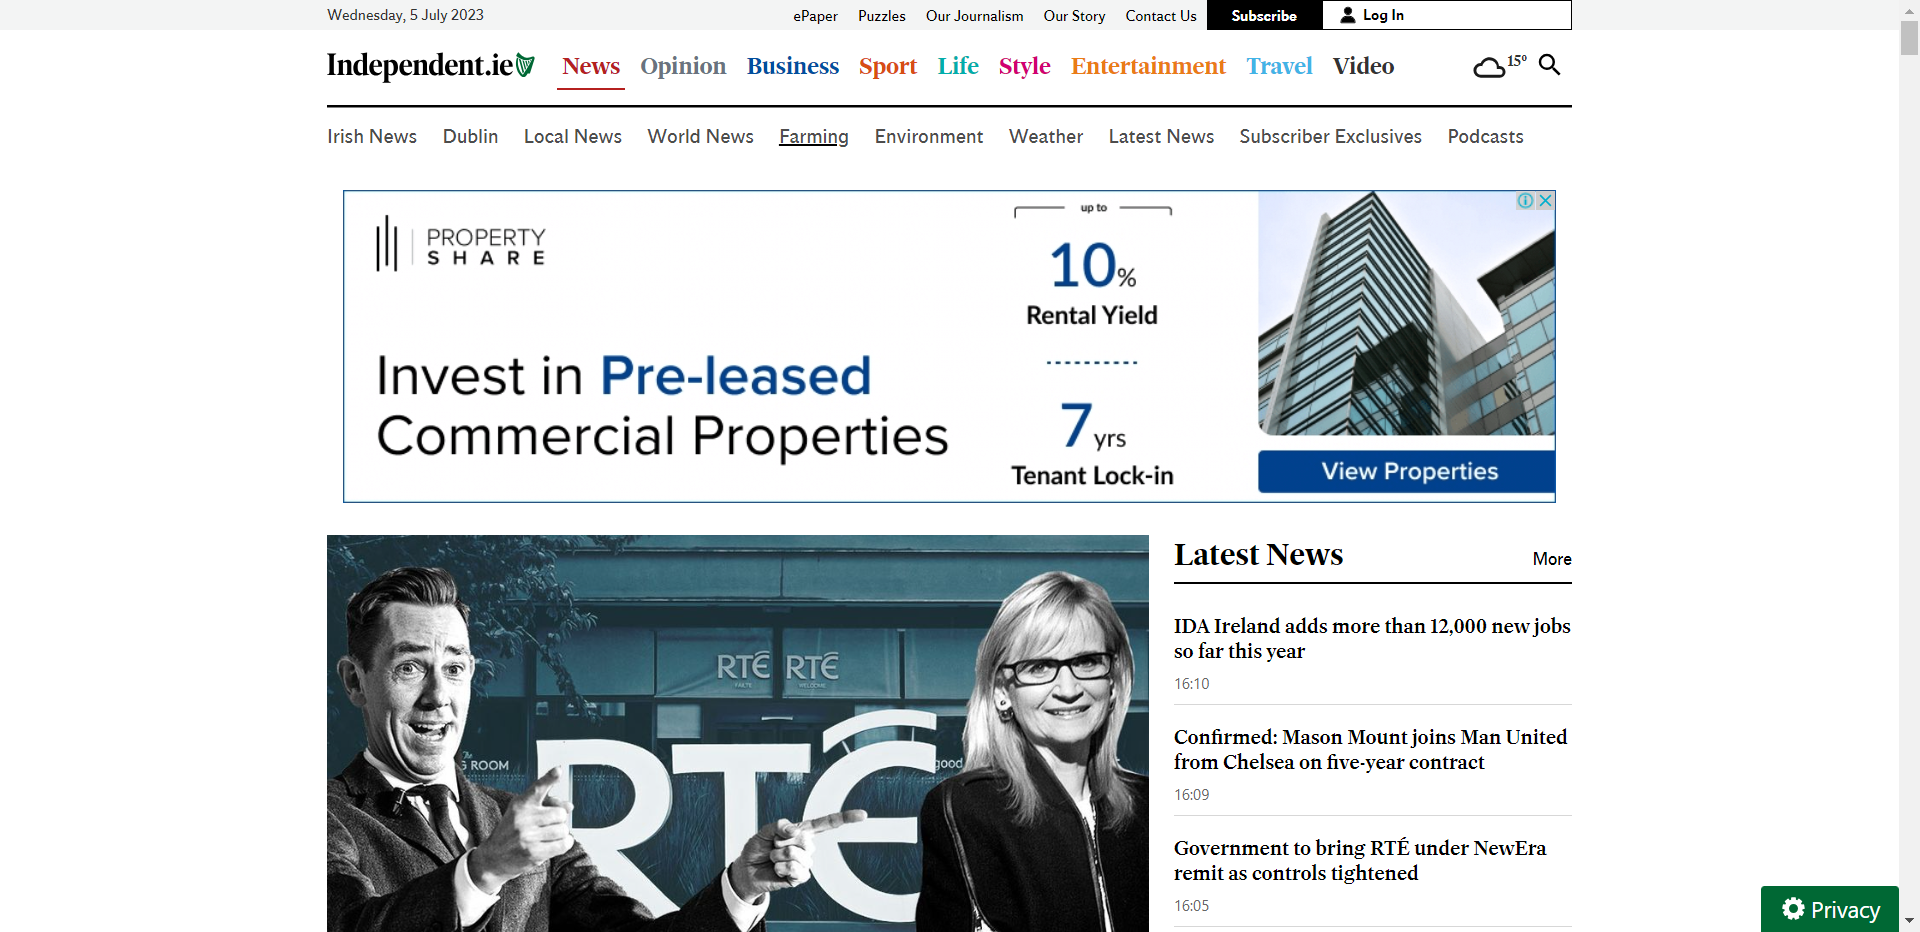

In [9]:
turn = turns[0]

print("HTML sneak peak:", turn.html[:75])
print("Random Bounding Box:", turn.bboxes['6b6a6598-3fac-43fc'])
print()

# Optional: We can even get the path to the screenshot and open with Pillow
# Install Pillow with: pip install Pillow
from PIL import Image
Image.open(turn.get_screenshot_path())

In [10]:
turn.get_screenshot_path()

'wl_data/demonstrations/aaabtsd/screenshots/screenshot-4-1.png'